In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

C:\Users\BigFace\AppData\Local\Temp/ipykernel_12496/2262077133.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [12]:
data = pd.read_csv('zufang.csv')

In [13]:
data.set_index(data['Unnamed: 0'].astype(int), inplace=True)
data.drop(columns='Unnamed: 0', inplace=True)
data.drop(index=91029235, inplace=True)
data.drop(index=90923584, inplace=True)

In [14]:
#数据完整不需要去重

null_sum = data.isnull().sum()
# data.columns[null_sum > len(data) * 0.3]
null_sum

property_type       0
region              0
community           0
business            0
room_type           0
living_room_num     0
sitting_root_num    0
square              0
angle               2
floor               0
furnish             0
price               0
dtype: int64

In [15]:
data.head()

,property_type,region,community,business,room_type,living_room_num,sitting_root_num,square,angle,floor,furnish,price
Unnamed: 0,,,,,,,,,,,,
90755020,整租,滨江区政府,倾城之恋花园,相寓,非推荐模型房源,4,1,216㎡,南北,高楼层/18层,精装,11800.0
34856138,整租,彩虹城,彩虹城,相寓,非推荐模型房源,3,2,125㎡,南,高楼层/26层,精装,6900.0
91004456,整租,彩虹城,世茂之西湖,相寓,非推荐模型房源,1,1,40㎡,东南,低楼层/28层,精装,4180.0
90582198,整租,滨江区政府,汉峰峰公馆公寓,相寓,非推荐模型房源,1,1,50㎡,北,高楼层/22层,简装,4300.0
30280916,整租,彩虹城,通策广场,相寓,非推荐模型房源,2,1,72㎡,南,中楼层/9层,精装,4522.0


In [16]:
data.dtypes

property_type        object
region               object
community            object
business             object
room_type            object
living_room_num      object
sitting_root_num      int64
square               object
angle                object
floor                object
furnish              object
price               float64
dtype: object

In [17]:
data['floor'] = data['floor'].replace(
    r'^.+/', '', regex=True).replace(
    r'.$', '', regex=True).astype(int)

In [18]:
areas = ['square']
for c in areas:
    # acres = data[c].str.contains('Acres') == True
    col = data[c].replace(r'\b㎡','', regex=True).astype(float)
    # col[acres] *= 43560
    data[c] = col

In [19]:
data['living_room_num'] = data['living_room_num'].astype(int)

In [49]:
data.describe()

,living_room_num,sitting_root_num,square,floor,price,Price per living sqft
count,234.0,234.0,234.000000,234.000000,234.000000,234.000000
mean,2.0,1.0,89.561581,22.465812,5761.730769,80.123604
std,0.0,0.0,211.887892,9.075796,1758.481898,27.129047
min,2.0,1.0,30.000000,1.000000,1500.000000,1.000000
25%,2.0,1.0,58.550000,18.000000,4900.000000,61.855670
50%,2.0,1.0,80.000000,23.000000,5500.000000,70.783168
75%,2.0,1.0,89.000000,29.000000,6500.000000,92.559524
max,2.0,1.0,3300.000000,45.000000,20000.000000,170.000000


[Text(3, 0, '1e+03'),
 Text(4, 0, '1e+04'),
 Text(5, 0, '1e+05'),
 Text(6, 0, '1e+06'),
 Text(7, 0, '1e+07'),
 Text(8, 0, '1e+08')]

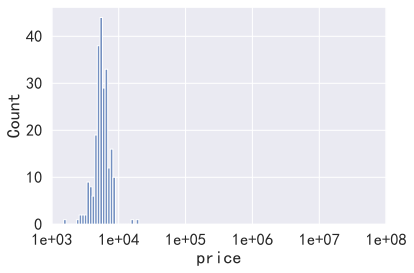

In [50]:
ax = sns.histplot(np.log10(data['price']))
ax.set_xlim([3, 8])
ax.set_xticks(range(3, 9))
ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()])

In [51]:
data['business'].value_counts()[0:20]

普租    184
相寓     50
Name: business, dtype: int64

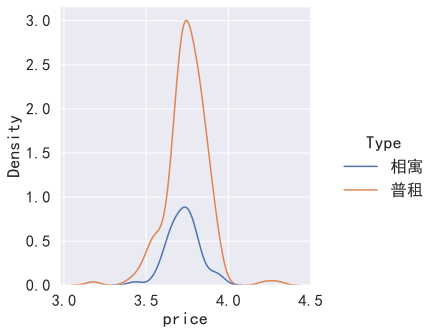

In [52]:
sns.displot(pd.DataFrame({'price':np.log10(data['price']),
                          'Type':data['business']}),
            x='price', hue='Type', kind='kde')

(2000.0, 10000.0)

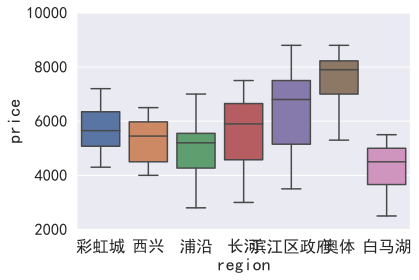

In [54]:
# data['Price per living sqft'] = data['Sold Price'] / data['Total interior livable area']
ax = sns.boxplot(x='region', y='price', data=data, fliersize=0)
ax.set_ylim([2000,10000])

(0.0, 10000.0)

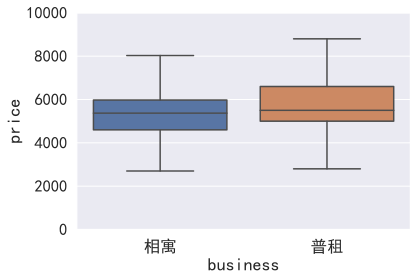

In [56]:
ax = sns.boxplot(x='business', y='price', data=data, fliersize=0)
ax.set_ylim([0,10000])

C:\Users\BigFace\AppData\Local\Temp/ipykernel_12496/1772958126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price per living sqft'] = data['price'] / data['square']


(0.0, 200.0)

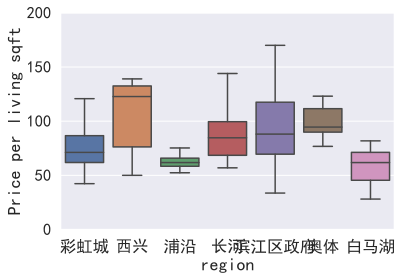

In [57]:
data['Price per living sqft'] = data['price'] / data['square']
ax = sns.boxplot(x='region', y='Price per living sqft', data=data, fliersize=0)
ax.set_ylim([0,200])

[Text(0, 0, '潮人汇大厦'),
 Text(1, 0, '逸天广场'),
 Text(2, 0, '天鸿君邑'),
 Text(3, 0, '盛元慧谷'),
 Text(4, 0, '茂御居'),
 Text(5, 0, '新郡大厦'),
 Text(6, 0, '彩虹城'),
 Text(7, 0, '江滨澜廷'),
 Text(8, 0, '太阳国际'),
 Text(9, 0, '寰宇天下'),
 Text(10, 0, '东方郡公寓'),
 Text(11, 0, '云杉郡景中心'),
 Text(12, 0, '水印城'),
 Text(13, 0, '钱塘景苑'),
 Text(14, 0, '银爵世纪公寓'),
 Text(15, 0, '云际创新中心'),
 Text(16, 0, '海威天地'),
 Text(17, 0, '钱塘帝景'),
 Text(18, 0, '钱江湾花园'),
 Text(19, 0, '钱塘星宇大厦')]

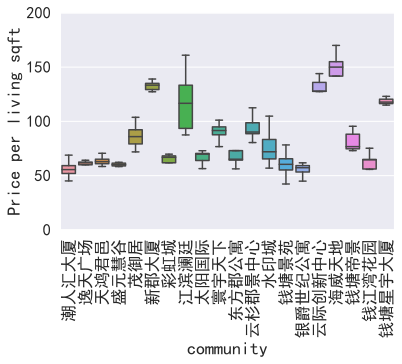

In [62]:
d = data[data['community'].isin(data['community'].value_counts()[:20].keys())]
ax = sns.boxplot(x='community', y='Price per living sqft', data=d, fliersize=0)
ax.set_ylim([0, 200])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)